Image Classification - Homer and Bart Simson (Seperat folders)
- Import the necessary libraries
- Unzipping the data
- Preprocessing on train and test dataset
  - Train test split
  - Adding some noise to the dataset, so that the model can identify even unclear images
  - Set image target size
  - Acheicved by creating an object for Image Data Generator
  - This automatically decides that there two classes of images
  - Use Image Data Generator on testing dataset, no need to add noise as it is test set
- Model building
  - Specify the netwrok type as Sequential
  - Add the input layer
  - Add 2 hidden layers
  - Flatten the output
  - Building 2 more dense layers
  - Adding the output layer with softmax activation
- Compile the model with Adam optimizer and categorical cross entropy loss
- Defining the early stop metrics
- Running the model on our dataset with the early stopping
- Evaluating our neural network
  - Plotting the validation loss
  - Plotting the validation accuracy
  - Check the prediction probablity of each image
  - Checking the prdictions vs actual images
  - Check the accuracy score
  - Checking the confusion matrix
  - Generating the classification report
- Saving and loading the model
  - Save the model
  - Load the model
- Download an image from internet to check our model
  - Resize the image
  - Scale the image matrix
  - Reshape the image to match our model
  - Feeding the image to our loaded model
- Building a function to classify images from internet
  - Getting bery bad results from the internet data. Check the code
  - Some issue with function only





In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import zipfile

from google.colab.patches import cv2_imshow
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
path='/content/homer_bart_2.zip'

zip_obect=zipfile.ZipFile(file=path,mode='r')
zip_obect.extractall('./')
zip_obect.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/homer_bart_2.zip' mode='r'>>

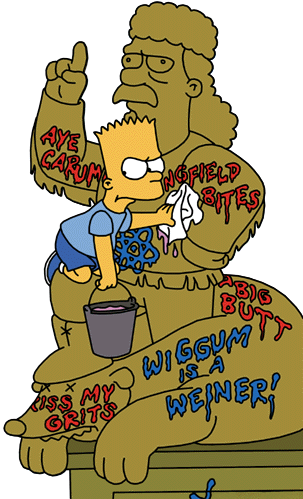

In [3]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart101.bmp')

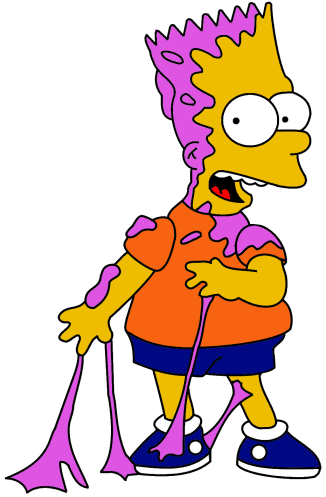

In [4]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/test_set/bart/bart1.bmp')

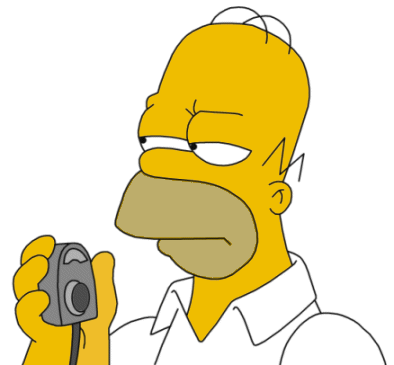

In [6]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer104.bmp')

#### Preprocessing on train and test datasets

In [7]:
training_generator = ImageDataGenerator(rescale = 1 / 255, rotation_range = 7, horizontal_flip = True,
                                        zoom_range = 0.2)
train_dataset = training_generator.flow_from_directory('/content/homer_bart_2/training_set', target_size = (64, 64),
                                                       batch_size = 8, class_mode = 'categorical', shuffle = True)


Found 215 images belonging to 2 classes.


In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
train_dataset.class_indices

# How did if find the names of two classes
# I think because of the two folders seperated within the training dataset

{'bart': 0, 'homer': 1}

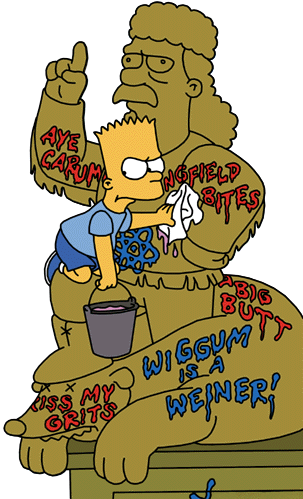

In [12]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart101.bmp')

# After adding noise
# But there is no difference, check on this

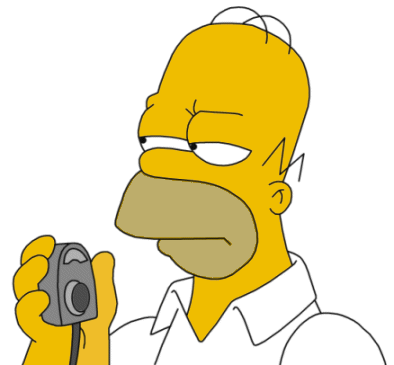

In [13]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer104.bmp')

In [14]:
test_generator = ImageDataGenerator(rescale = 1 / 255)
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set', target_size = (64, 64),
                                                  batch_size = 1, class_mode = 'categorical', shuffle = False)

Found 54 images belonging to 2 classes.


#### Model Building

In [16]:
network = Sequential()

network.add(Conv2D(64, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
network.add(MaxPooling2D(pool_size = (2, 2)))

network.add(Conv2D(32, (3,3), activation = 'relu'))
network.add(MaxPooling2D(pool_size = (2, 2)))

network.add(Conv2D(32, (3,3), activation = 'relu'))
network.add(MaxPooling2D(pool_size = (2, 2)))

network.add(Flatten())

# network.add(Dense(units = 3137, activation='relu'))
# network.add(Dense(units = 3137, activation='relu'))
# network.add(Dense(units = 2, activation='softmax'))

In [18]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)         

In [19]:
network.add(Dense(units = 1152, activation = 'relu'))
network.add(Dense(units = 512, activation = 'relu'))
network.add(Dense(units = 2, activation = 'softmax'))

In [20]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)         

In [21]:
network.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [25]:
history = network.fit_generator(train_dataset, epochs = 50, validation_data = test_dataset,
                                callbacks = [early_stopping])

Epoch 1/50


<ipython-input-25-f4ba5fab7600>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs = 50, validation_data = test_dataset,


27/27 [==============================] - 6s 61ms/step - loss: 0.7032 - accuracy: 0.5860 - val_loss: 0.6894 - val_accuracy: 0.5185
Epoch 2/50
27/27 [==============================] - 1s 25ms/step - loss: 0.6446 - accuracy: 0.6279 - val_loss: 0.5309 - val_accuracy: 0.7963
Epoch 3/50
27/27 [==============================] - 1s 26ms/step - loss: 0.5578 - accuracy: 0.7302 - val_loss: 0.3895 - val_accuracy: 0.8333
Epoch 4/50
27/27 [==============================] - 1s 32ms/step - loss: 0.4684 - accuracy: 0.7535 - val_loss: 0.7401 - val_accuracy: 0.5926
Epoch 5/50
27/27 [==============================] - 1s 40ms/step - loss: 0.3885 - accuracy: 0.8279 - val_loss: 0.8048 - val_accuracy: 0.7222
Epoch 6/50
27/27 [==============================] - 1s 43ms/step - loss: 0.3760 - accuracy: 0.8372 - val_loss: 0.7535 - val_accuracy: 0.7778
Epoch 7/50
27/27 [==============================] - 1s 25ms/step - loss: 0.3724 - accuracy: 0.8419 - val_loss: 0.4087 - val_accuracy: 0.8148
Epoch 8/50
27/27 [======

#### Evaluating the neural netwrok

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

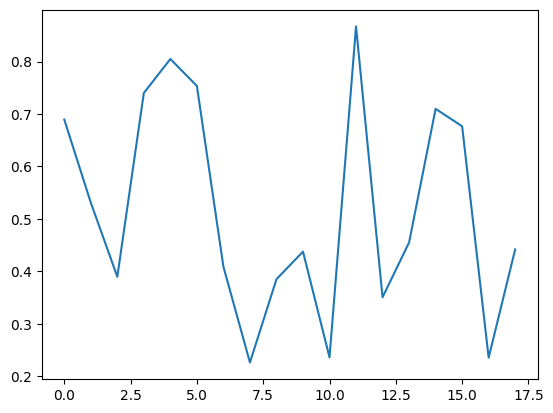

In [30]:
plt.plot(history.history['val_loss'])

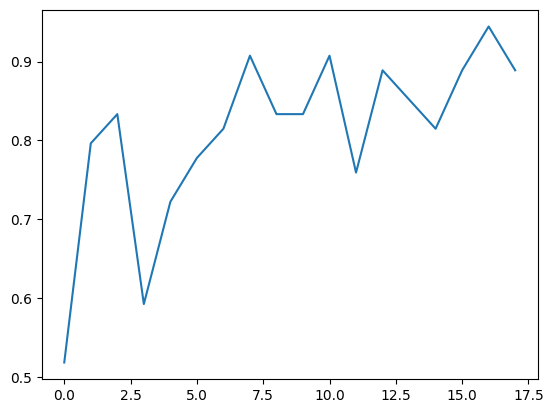

In [31]:
plt.plot(history.history['val_accuracy'])

In [32]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [34]:
# Checking the predicton probability of each class in test dataset

predictions = network.predict(test_dataset)
predictions

54/54 [==============================] - 0s 3ms/step


array([[1.0000000e+00, 4.3668593e-09],
       [1.0000000e+00, 2.3216634e-10],
       [7.5746381e-01, 2.4253616e-01],
       [1.0000000e+00, 8.1046830e-14],
       [1.0000000e+00, 1.7826872e-10],
       [1.0000000e+00, 5.3731243e-12],
       [9.9999940e-01, 5.9242967e-07],
       [5.4237437e-01, 4.5762569e-01],
       [9.8012060e-01, 1.9879442e-02],
       [9.5767802e-01, 4.2322002e-02],
       [2.5870088e-01, 7.4129915e-01],
       [1.0000000e+00, 2.6628273e-09],
       [9.8630863e-01, 1.3691403e-02],
       [9.9818951e-01, 1.8105257e-03],
       [9.9969554e-01, 3.0442805e-04],
       [1.0000000e+00, 3.2376265e-12],
       [1.6964686e-01, 8.3035314e-01],
       [9.7991335e-01, 2.0086637e-02],
       [7.4741614e-01, 2.5258383e-01],
       [1.0000000e+00, 4.5332252e-13],
       [9.9113315e-01, 8.8668754e-03],
       [1.0000000e+00, 4.2135301e-08],
       [9.9543768e-01, 4.5623723e-03],
       [6.2073957e-02, 9.3792605e-01],
       [9.9999404e-01, 6.0107132e-06],
       [9.9985957e-01, 1.

In [36]:
# Converting the predictions into labels

predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [37]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [40]:
accuracy_score(test_dataset.classes,predictions)

0.9074074074074074

In [42]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

<Axes: >

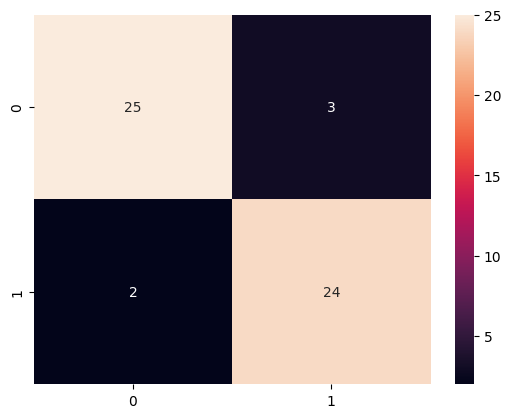

In [44]:
confu_matrix = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(confu_matrix, annot = True)

In [46]:
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.89      0.92      0.91        26

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



#### Saving and Loading Data

In [48]:
# Save the model
network.save('my_cnn_model.h5')

load_model = load_model('my_cnn_model.h5')
load_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)         

#### Classifying images from internet

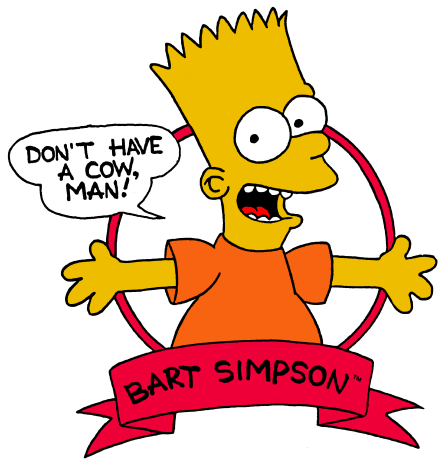

In [49]:
image = cv2.imread('/content/homer_bart_2/test_set/bart/bart26.bmp')
cv2_imshow(image)

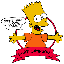

In [51]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
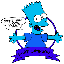

In [52]:
image

In [53]:
image = image / 255
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [55]:
image.shape

(64, 64, 3)

In [57]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [59]:
result = load_model(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.0000000e+00, 6.4537384e-09]], dtype=float32)>

In [60]:
result = np.argmax(result)
result

0

In [62]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [63]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Bart


In [79]:
def bart_or_homer(image_address):
  result = 0
  image = cv2.imread(image_address)
  cv2_imshow(image)
  image = cv2.resize(image, (64, 64))
  image = image / 255
  image = image.reshape(-1, 64, 64, 3)
  result = load_model(image)
  result = np.argmax(result)

  if result == 0:
    print("Predicted as Bart")

  elif result == 1:
    print("Predicted as Homer")

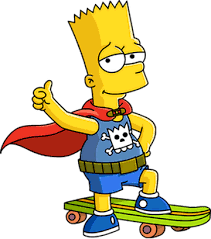

Predicted as Homer


In [88]:
bart_or_homer('/content/download (1).png')

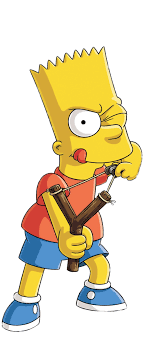

Predicted as Homer


In [81]:
bart_or_homer('/content/download (2).png')

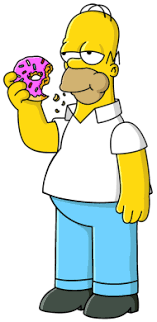

Predicted as Homer


In [82]:
bart_or_homer('/content/download (3).png')

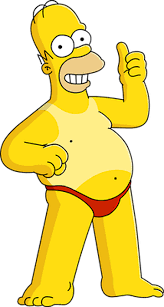

Predicted as Homer


In [83]:
bart_or_homer('/content/download (4).png')

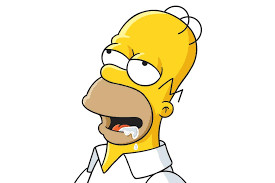

Predicted as Homer


In [84]:
bart_or_homer('/content/download (5).png')

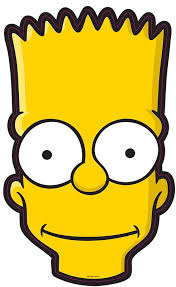

Predicted as Homer


In [85]:
bart_or_homer('/content/download.jpg')

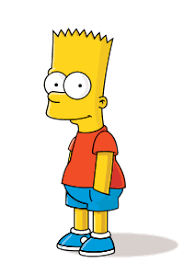

Predicted as Homer


In [86]:
bart_or_homer('/content/download.png')

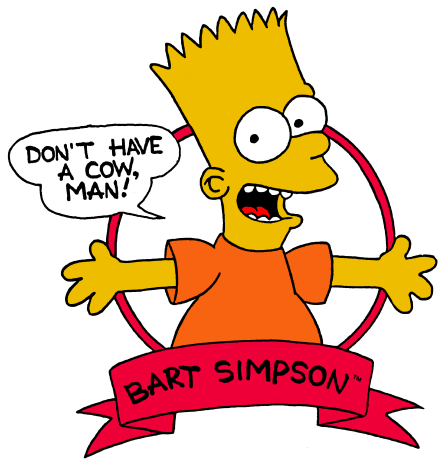

Predicted as Bart


In [87]:
bart_or_homer('/content/homer_bart_2/test_set/bart/bart26.bmp')

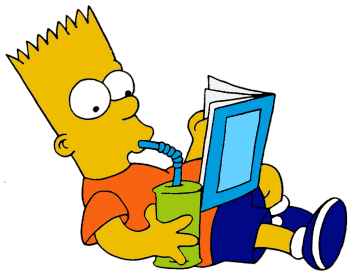

Predicted as Homer


In [89]:
bart_or_homer('/content/homer_bart_2/test_set/bart/bart7.bmp')

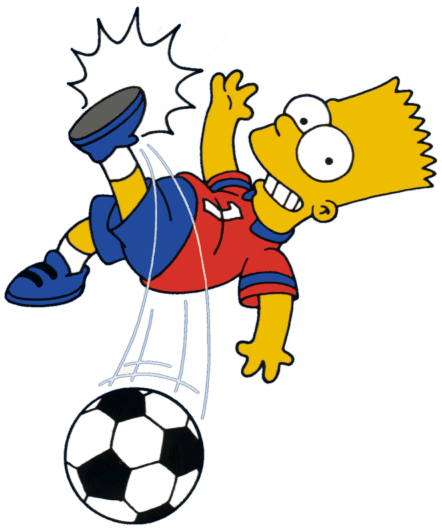

Predicted as Homer


In [90]:
bart_or_homer('/content/homer_bart_2/test_set/bart/bart5.bmp')

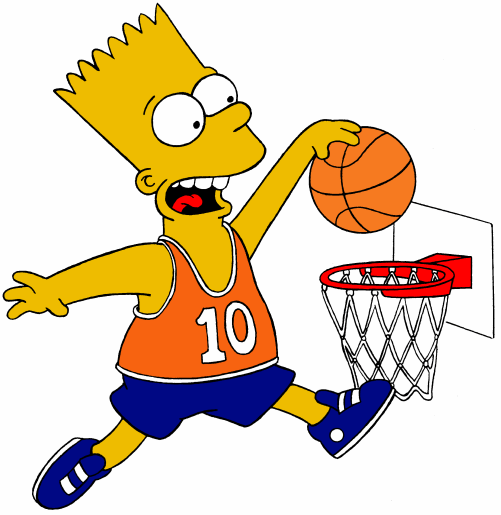

Predicted as Homer


In [91]:
bart_or_homer('/content/homer_bart_2/test_set/bart/bart2.bmp')